In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
df = pd.read_csv('dataset_2019041.csv',header=None)

In [0]:
df.columns = ['x', 'y' , 'z' , 'timestamp' , 'activity' , 'user']

In [0]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
df.shape

(23069658, 6)

In [0]:
df_loc = df[['x','y','z']]

# means

In [0]:
df_loc_lagged = df_loc.shift(1)

In [0]:
df_squared = (df_loc - df_loc_lagged)**2

In [0]:
euclidean_dist =  np.sqrt(df_squared['x'] + df_squared['y'] + df_squared['z']) # in meters
euclidean_dist = euclidean_dist.fillna(0)/100

In [0]:
timestamp = df['timestamp']

In [0]:
timestamp_lagged = timestamp.shift(1)

In [0]:
time_diff = (timestamp - timestamp_lagged)

In [0]:
time_diff = time_diff/np.timedelta64(1,'s')

In [0]:
time_diff = time_diff.fillna(0)

In [0]:
speeds = euclidean_dist / time_diff

In [0]:
speeds = speeds.fillna(0)
speeds = speeds[np.isfinite(speeds)]

### Mean (Z axis, X axis, Y axis, Acceleration, Velocity, Gravity, Peaks, Toughs) 

In [0]:
speeds.mean()

0.05773705779509397

In [0]:
accelerations = speeds / time_diff
accelerations = accelerations[np.isfinite(accelerations)]

In [0]:
accelerations.mean()

5.975994795678755

In [0]:
df_loc['x'].mean()

0.29189325072544653

In [0]:
df_loc['y'].mean()

0.05766643336181805

In [0]:
df_loc['z'].mean()

0.2659202195927683

In [0]:
means_of = ['velocity','acceleration','x','y','z']
means = np.array([ speeds.mean(), accelerations.mean(), df_loc['x'].mean(),df['y'].mean(),df['z'].mean()  ])

plt.bar(means_of,means)
plt.show()



### Standard Deviation (Acceleration, X axis, Y axis, Z axis, Gravity) 

In [0]:
speeds.std()

0.0949724762079994

In [0]:
accelerations.std()

19.879319166241253

In [0]:
df_loc['x'].std()

0.552182755002322

In [0]:
df_loc['y'].std()

0.5339892627318953

In [0]:
df_loc['z'].std()

0.519317435977243

In [0]:
stds_of = ['velocity','accelerations','x','y','z']
stds = np.array([ speeds.std(), accelerations.std(), df_loc['x'].std(),df['y'].std(),df['z'].std()  ])

plt.bar(stds_of,stds)
plt.show()



### Minimum (Acceleration, X axis, Y axis, Z axis) 

In [0]:
speeds.min()

-2.530054718795045e-09

In [0]:
accelerations.min()

0.0

In [0]:
df_loc['x'].min()

-14.9216651916504

In [0]:
df_loc['y'].min()

-10.6498374938965

In [0]:
df_loc['z'].min()

-16.715431213378903

In [0]:
mins_of = ['velocity','accelerations','x','y','z']
mins = np.array([ speeds.min(), accelerations.min(), df_loc['x'].min(),df['y'].min(),df['z'].min()  ])

plt.bar(mins_of,mins)
plt.show()



### Maximum (Acceleration, X axis, Y axis, Z axis) 

In [0]:
speeds.max()

20.44677291778958

In [0]:
accelerations.max()

10866.271735568986

In [0]:
df_loc['x'].max()

15.833599090576199

In [0]:
df_loc['y'].max()

16.041193008422898

In [0]:
df_loc['z'].max()

15.7520179748535

In [0]:
maxs_of = ['velocity','accelerations','x','y','z']
maxs = np.array([ speeds.max(), accelerations.max(), df_loc['x'].max(),df['y'].max(),df['z'].max()  ])

plt.bar(maxs_of,maxs)
plt.show()



### Correlation (X axis, Y axis, Z axis) 

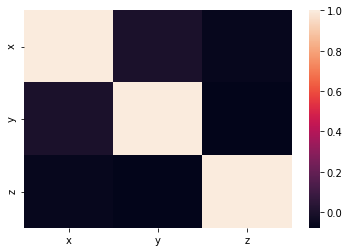

In [0]:
import seaborn as sns
corr = df_loc.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Variance (Acceleration, X axis, Y axis, Z axis) 

In [0]:
np.var(accelerations)

395.18731338252593

In [0]:
np.var(df_loc['x'])

0.30490578170520893

In [0]:
np.var(df_loc['y'])

0.28514452035279875

In [0]:
np.var(df_loc['z'])

0.2696905876197049

In [0]:
vars_of = ['velocity','accelerations','x','y','z']
vars = np.array([ np.var(speeds), np.var(accelerations), np.var(df_loc['x']),np.var(df['y']),np.var(df['z'])])

plt.bar(vars_of,vars)
plt.show()



### Median (Acceleration, Peaks, Toughs) 

In [0]:
np.median(accelerations)

3.4023051874127974

### Skewness (Acceleration, X axis, Y axis, Z axis) 

In [0]:
accelerations.skew()

344.3392711675957

In [0]:
df_loc['x'].skew()

-0.6569585059319654

In [0]:
df_loc['y'].skew()

0.1207344616217057

In [0]:
df_loc['z'].skew()

-0.4096187166551467

In [0]:
skews_of = ['velocity','accelerations','x','y','z']
skews = np.array([ speeds.skew(), accelerations.skew(), df_loc['x'].skew(),df['y'].skew(),df['z'].skew()  ])

plt.bar(skews_of,skews)
plt.show()



### Kurtosis (Acceleration, X axis, Y axis, Z axis) 

In [0]:
accelerations.kurtosis()

163586.3153857468

In [0]:
df_loc['x'].kurtosis()

0.6789698791696543

In [0]:
df_loc['y'].kurtosis()

0.5021260687005231

In [0]:
df_loc['z'].kurtosis()

0.004007178506668652

In [0]:
kurtosis_of = ['velocity','accelerations','x','y','z']
kurtosis = np.array([ speeds.kurtosis(), accelerations.kurtosis(), df_loc['x'].kurtosis(),df['y'].kurtosis(),df['z'].kurtosis()  ])

plt.bar(kurtosis_of,kurtosis)
plt.show()



### Inter-quartile-Range (Acceleration) 

In [0]:
Q1 = accelerations.quantile(0.25)
Q3 = accelerations.quantile(0.75)
IQR = Q3 - Q1

In [0]:
IQR

7.384715041262587

### Root Mean Square (Acceleration, X axis, Y axis, Z axis) 

In [0]:
(np.diff(accelerations) ** 2).mean() ** .5

25.23487032543694

In [0]:
(np.diff(df_loc['x']) ** 2).mean() ** .5

0.06782153219531285

In [0]:
(np.diff(df_loc['y']) ** 2).mean() ** .5

0.05488908513847103

In [0]:
(np.diff(df_loc['z']) ** 2).mean() ** .5

0.06058603649700729

# Entropy (Acceleration) 

In [0]:
import scipy as sc
# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

In [0]:
ent(accelerations)

10.857863527199532

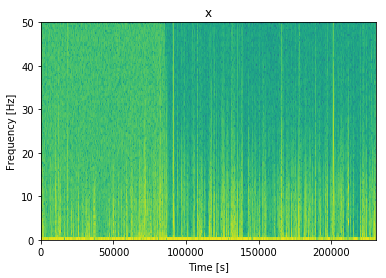

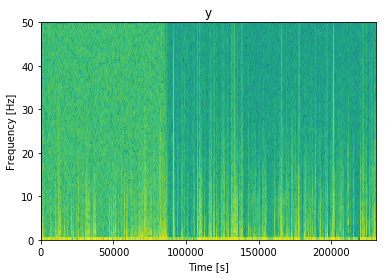

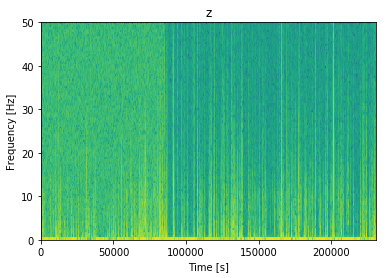

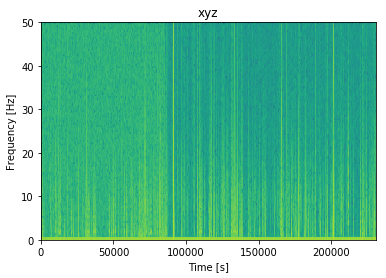

In [0]:
fake_size = df_loc.shape[0]
time = np.arange(fake_size)/100 # 100 Hz

x = df_loc['x']
y = df_loc['y']
z = df_loc['z']

xyz_magnitude = x**2 + y**2 + z**2

to_plot = [('x', x), ('y', y), ('z', z), ('xyz', xyz_magnitude)]

for chl, data in to_plot:
    plt.figure(); 
    plt.title(chl)
    plt.specgram(data, Fs=100)
    plt.xlabel('Time [s]'); 
    plt.ylabel('Frequency [Hz]')

### Still working on Gravity, Peaks and Troughs